In [2]:
# --- packages --- #
import numpy as np 
import pandas as pd
import os, sys, glob

import matplotlib.pyplot as plt
import matplotlib.colors as colors


from ctapipe_io_magic import MAGICEventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.io import EventSeeker, EventSource
from ctapipe.instrument import CameraGeometry
import astropy.units as u
import tables

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import geometry as geom
# graphic parameters
aux.params()

# creating a folder to save the plots
pltpath = 'plots/3_events/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi = 200

In [15]:
source_name = 'Crab'

path_merged = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_merged_{source_name}.h5'
df_merged =  pd.read_hdf(path_merged, key='events/parameters')

path_mean   = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_mean_{source_name}.h5'
df_mean   =  pd.read_hdf(path_mean,   key='events/parameters')

df_T1 = df_merged.query('tel_id == 1', inplace=False)
df_T2 = df_merged.query('tel_id == 2', inplace=False)
df_T3 = df_merged.query('tel_id == 3', inplace=False)

In [16]:
# this config done since ev80
# energy    = 3
# gammaness = 0.7 
# intensity = 400
# camera_dist = 0.3
# dist_impact = 100

energy    = 1
gammaness = 0.9
intensity = 9000
camera_dist = 0.3
dist_impact = 100


mask_eg   = f'reco_energy > {energy} and gammaness > {gammaness} '
mask_cent = f'and x > -{camera_dist} and x < {camera_dist} and y > -{camera_dist} and y < {camera_dist}' 
mask_impact = f'and core_x > -{dist_impact} and core_x < {dist_impact} and core_y > -{dist_impact} and core_y< {dist_impact}'


# ############################
# df_mean.reset_index(inplace=True)
# df_mean.query(mask_eg, inplace=True)
# ############################


#######################333
df_T1.query(f'intensity < {intensity} and obs_id != 7198 and gammaness > 0.6', inplace=True)
df_mean.query(f'reco_energy < {energy}',inplace=True)
##########################

total_ids1 = df_T1['total_id']
total_ids2 = df_mean['total_id']
total_ids  =  set(total_ids1) & set(total_ids2)


df_T1.reset_index(inplace=True)
df_T2.reset_index(inplace=True)
df_T3.reset_index(inplace=True)
df_mean.reset_index(inplace=True)



df_T1.query(f'total_id in @total_ids', inplace=True)
df_T2.query(f'total_id in @total_ids', inplace=True)
df_T3.query(f'total_id in @total_ids', inplace=True)
df_mean.query(f'total_id in @total_ids', inplace=True)

# df_evs = df_T1.sort_values('obs_id', inplace=True)

up, do = (230, 240)
df_T1 = df_T1[up:do]
df_T2 = df_T2[up:do]
df_T3 = df_T3[up:do]
df_mean = df_mean[up:do]

(df_T1)

/tmp/ipykernel_16511/648698662.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T1.query(f'intensity < {intensity} and obs_id != 7198 and gammaness > 0.6', inplace=True)
/tmp/ipykernel_16511/648698662.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T1.query(f'total_id in @total_ids', inplace=True)
/tmp/ipykernel_16511/648698662.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T2.query(f'total_id in @total_ids', in

obs_id  event_id  tel_id  obs_id_magic  event_id_magic  obs_id_lst  \
261    2923   2468817       1       5093174           10128      2923.0   
262    2923   2476215       1       5093174           10263      2923.0   
263    2923   2477356       1       5093174           10285      2923.0   
264    2923   2479522       1       5093174           10338      2923.0   
265    2923   2483165       1       5093174           10403      2923.0   
266    2923   2488958       1       5093174           10535      2923.0   
267    2923   2491385       1       5093174           10582      2923.0   
268    2923   2493587       1       5093174           10622      2923.0   
271    2923   2496920       1       5093174           10677      2923.0   
272    2923   2499505       1       5093174           10730      2923.0   

     event_id_lst    intensity         x         y         r         phi  \
261     2468817.0   404.382353 -0.623096  0.089141  0.629440  171.858423   
262     2476215.0   547.744115  0.101525  0.108747  0.148772   46.967308   
263     2477356.0   282.330192 -0.425378  0.581233  0.720263  126.198684   
264     2479522.0   240.038032 -0.193978  0.639805  0.668564  106.866414   
265     2483165.0   134.527283 -0.263854 -0.262296  0.372046 -135.169695   
266     2488958.0   638.930204 -0.446848 -0.213923  0.495415 -154.417871   
267     2491385.0   301.209944 -0.502878  0.087975  0.510515  170.076941   
268     2493587.0  1369.193594  0.141733  0.325572  0.355085   66.474786   
271     2496920.0   174.215523  0.082563  0.185095  0.202674   65.960410   
272     2499505.0   449.442886 -0.619369 -0.051302  0.621491 -175.264992   

       length  length_uncertainty     width  width_uncertainty        psi  \
261  0.053614            0.003529  0.042126           0.003193  71.090817   
262  0.074022            0.004414  0.023364           0.002115 -18.995649   
263  0.047815            0.003929  0.028507           0.002754 -49.842736   
264  0.077178            0.005881  0.033107           0.003663  35.006743   
265  0.090872            0.005593  0.028411           0.002853  -4.641598   
266  0.130505            0.009057  0.034057           0.002225 -44.965235   
267  0.064582            0.004175  0.035401           0.002287   4.191238   
268  0.079050            0.002813  0.056013           0.002282  37.475465   
271  0.112760            0.007563  0.030071           0.003544  10.656433   
272  0.098080            0.005616  0.029948           0.001978 -35.926041   

     skewness  kurtosis      slope  intercept  intensity_width_1  \
261 -0.265442  2.673770   1.575471  15.864319                0.0   
262 -0.284118  2.860896  -0.746879  17.582306                0.0   
263  0.104974  2.821360   3.641522  17.769910                0.0   
264 -0.073207  2.331278 -19.930370  15.958580                0.0   
265 -0.361916  1.486795  -8.734351  13.471481                0.0   
266 -1.029956  3.939374 -10.118657  17.577148                0.0   
267 -0.097992  2.202750   0.798104  14.282999                0.0   
268 -0.137117  2.655939  -1.771469  15.601017                0.0   
271  0.125048  1.748616  -3.399388  15.166803                0.0   
272  0.266300  2.407763  -1.034221  15.770830                0.0   

     intensity_width_2  pixels_width_1  pixels_width_2  n_pixels  n_islands  \
261                0.0             0.0             0.0        20          1   
262                0.0             0.0             0.0        17          1   
263                0.0             0.0             0.0        14          1   
264                0.0             0.0             0.0        18          1   
265                0.0             0.0             0.0        10          2   
266                0.0             0.0             0.0        35          2   
267                0.0             0.0             0.0        17          1   
268                0.0             0.0             0.0        44          1   
271                0.0            

In [17]:
run_m      = df_T1['obs_id_magic'].to_numpy()
run_l      = df_T1['obs_id'].to_numpy()
event_id_m = df_T1['event_id_magic'].to_numpy()
event_id_l = df_T1['event_id'].to_numpy()

energ  = df_mean['reco_energy'].to_numpy()
gamma  = df_mean['gammaness'].to_numpy()

corex      = [df['x'].to_numpy()               for df in [df_T1, df_T2, df_T3]]
corey      = [df['y'].to_numpy()               for df in [df_T1, df_T2, df_T3]]
width  = [df['width'].to_numpy()           for df in [df_T1, df_T2, df_T3]]
length = [df['length'].to_numpy()          for df in [df_T1, df_T2, df_T3]]
angle  = [np.deg2rad(df['psi'].to_numpy()) for df in [df_T1, df_T2, df_T3]]

In [18]:
def find_firstev_srun_magic(files):
    events_srun = []
    for i, srun in enumerate(files):
        event_source = MAGICEventSource(input_url=srun, process_run=False, max_events=1)
        seeker       = EventSeeker(event_source=event_source)
        event        = seeker.get_event_index(0)
        events_srun.append(event.index.event_id)    
    return events_srun

def find_subrun(ev_id, events_srun):
    srun_index = None
    for i in range(len(events_srun)-1):
        if ev_id >= events_srun[i] and ev_id < events_srun[i+1]:
            srun_index = i
    if srun_index == None:
        if ev_id > events_srun[-1]:
            srun_index = range(len(events_srun))[-1]
    return srun_index

## Finding the correspondent subruns

In [19]:
%%time

abs_run_m = sorted(np.unique(run_m))

abs_files_m1, abs_files_m2 = [], []
for i, run in enumerate(abs_run_m):
    abs_files_m1.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/*/*/*/*{run}.*_Y_*.root')))
    abs_files_m2.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M2/event/Calibrated/*/*/*/*{run}.*_Y_*.root')))
    
files_m1, files_m2 = [], []    
for i, run in enumerate(run_m):
    files_m1.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/*/*/*/*{run}.*_Y_*.root')))
    files_m2.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M2/event/Calibrated/*/*/*/*{run}.*_Y_*.root'))) 
    
events_srun_m1, events_srun_m2 = [], [] 
for i, run in enumerate(abs_run_m):
    print(f'Reading... {i} of {len(abs_run_m)} --> {i/len(abs_run_m)*100:.1f}%')
    events_srun_m1.append(find_firstev_srun_magic(abs_files_m1[i]))
    events_srun_m2.append(find_firstev_srun_magic(abs_files_m2[i]))
    
srun_m1, srun_m2 = [], []    
for i, ev in enumerate(event_id_m): 
    
    index = np.where(abs_run_m == run_m[i])[0][0]
    events_srun1 = events_srun_m1[index]
    events_srun2 = events_srun_m2[index]
    
    srun_m1.append(find_subrun(event_id_m[i], events_srun1))
    srun_m2.append(find_subrun(event_id_m[i], events_srun2))
    
srun_l = event_id_l//53000

Reading... 0 of 1 --> 0.0%


Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
D

Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.
File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.
File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.
File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020

CPU times: user 2min 3s, sys: 17.5 s, total: 2min 20s
Wall time: 2min 21s


## Finding filenames

In [20]:
file_m1 = np.array([files_m1[i][srun_m1[i]] for i in range(len(files_m1))])
file_m2 = np.array([files_m2[i][srun_m2[i]] for i in range(len(files_m2))])

file_l = [glob.glob(f'/fefs/aswg/data/real/DL1/*/*/tailcut84/dl1*{run:05.0f}.{srun_l[i]:04.0f}.h5')[0] for i, run in enumerate(run_l)]

## Extracting LST images

In [21]:
%%time

image_l = []
for i in range(len(file_l)):

    try:
        table = tables.open_file(file_l[i])
        event_index = np.where(table.root.dl1.event.telescope.image.LST_LSTCam.col('event_id')==event_id_l[i])[0][0]
        image_l.append(table.root.dl1.event.telescope.image.LST_LSTCam.col('image')[event_index])
        
    except:
        fl = file_l[i].replace(f'{srun_l[i]:04.0f}', f'{srun_l[i]-1:04.0f}')
        
        table = tables.open_file(fl)
        event_index = np.where(table.root.dl1.event.telescope.image.LST_LSTCam.col('event_id')==event_id_l[i])[0][0]
        image_l.append(table.root.dl1.event.telescope.image.LST_LSTCam.col('image')[event_index])

CPU times: user 20.9 s, sys: 7.35 s, total: 28.3 s
Wall time: 29.3 s


## Extracting MAGIC images

In [22]:
%%time

image_m1, image_m2 = [], []

for i in range(len(file_m1)):
    
    print(f'{i} of {len(file_m1)} -{run_m[i]}-{event_id_m[i]}\n-->{file_m1[i]}')
    
    event_source1 = MAGICEventSource(input_url=file_m1[i], process_run=False,)
    event_source2 = MAGICEventSource(input_url=file_m2[i], process_run=False,)

    seeker1 = EventSeeker(event_source=event_source1)
    seeker2 = EventSeeker(event_source=event_source2)

    event1 = seeker1.get_event_id(event_id_m[i])
    event2 = seeker2.get_event_id(event_id_m[i])
    
    image_m1.append(event1.dl1.tel[1].image)
    image_m2.append(event2.dl1.tel[2].image)
    

0 of 10 -5093174-10128
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


1 of 10 -5093174-10263
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


2 of 10 -5093174-10285
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


3 of 10 -5093174-10338
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


4 of 10 -5093174-10403
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


5 of 10 -5093174-10535
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


6 of 10 -5093174-10582
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


7 of 10 -5093174-10622
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


8 of 10 -5093174-10677
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


9 of 10 -5093174-10730
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2020/11/19/20201119_M1_05093174.001_Y_CrabNebula-W0.40+035.root


File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 143 drive reports.
Drive reports available from 2020-11-18 23:35:45.715 to 2020-11-18 23:55:35.270.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 140 drive reports.
Drive reports available from 2020-11-18 23:35:45.888 to 2020-11-18 23:55:35.443.


CPU times: user 3min 10s, sys: 9.49 s, total: 3min 19s
Wall time: 3min 19s


## Extract camera geometries

## Change camera geometries

In [23]:
event_source1 = MAGICEventSource(input_url=file_m1[0], process_run=False,)
event_source2 = MAGICEventSource(input_url=file_m2[0], process_run=False,)

subarray1 = event_source1.subarray
subarray2 = event_source2.subarray

camera_geometry_m1 = subarray1.tel[1].camera.geometry
camera_geometry_m2 = subarray2.tel[2].camera.geometry

# reading camera geometries
camera_geometry_l = CameraGeometry.from_name('LSTCam', version=2)

# modifying them
tel_x, tel_y = np.array([-77.13, 62.55, 14.57]), np.array([-8.09, 39.30, -31.21])
tel_x, tel_y = tel_x/50, tel_y/50

xm1 = camera_geometry_m1.pix_x
ym1 = camera_geometry_m1.pix_y
xm2 = camera_geometry_m2.pix_x
ym2 = camera_geometry_m2.pix_y
xl = camera_geometry_l.pix_x
yl = camera_geometry_l.pix_y

camera_geometry_m1.pix_x, camera_geometry_m1.pix_y = xm1 + tel_x[1]*u.m, ym1 + tel_y[1]*u.m
camera_geometry_m2.pix_x, camera_geometry_m2.pix_y = xm2 + tel_x[2]*u.m, ym2 + tel_y[2]*u.m

camera_geometry_l.pix_x, camera_geometry_l.pix_y = -yl + tel_x[0]*u.m, -xl + tel_y[0]*u.m

camera_geometry_l.pix_rotation = camera_geometry_l.pix_rotation*2
camera_geometry_m1.pix_rotation = camera_geometry_m1.pix_rotation
camera_geometry_m2.pix_rotation = camera_geometry_m2.pix_rotation

File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.


## Plot it

0 of 10


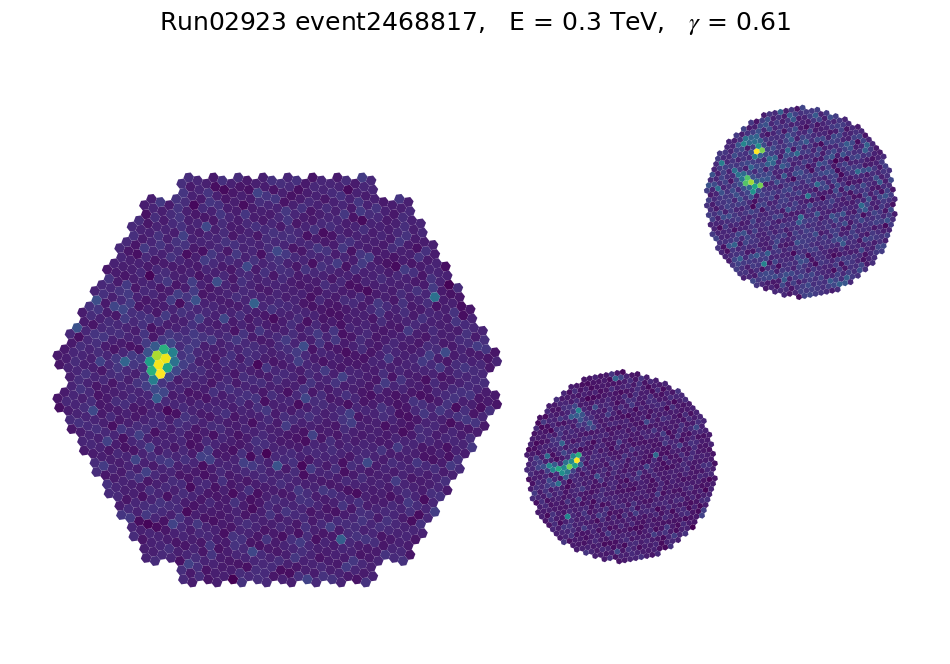

1 of 10


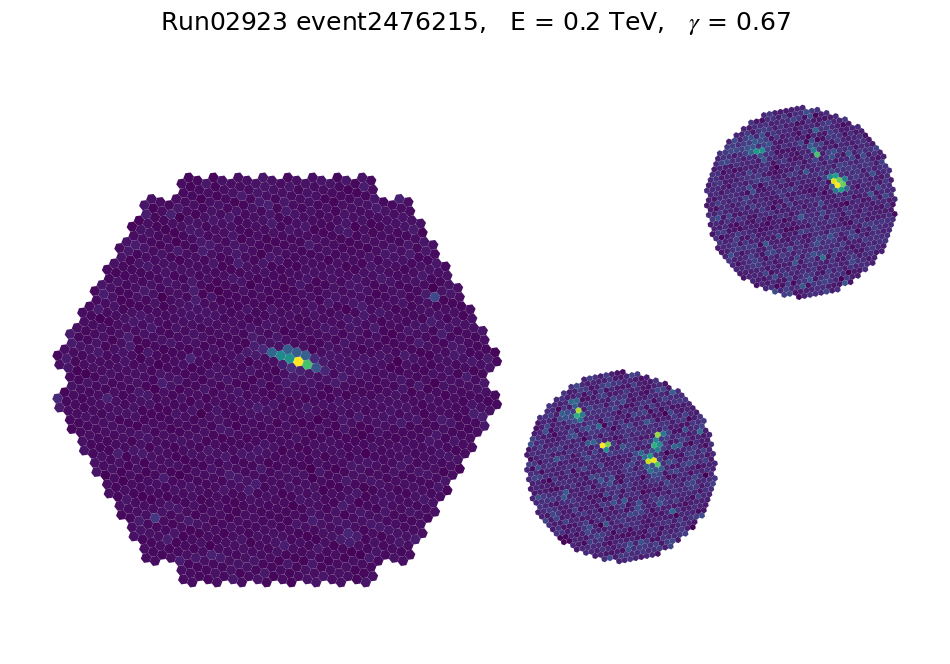

2 of 10


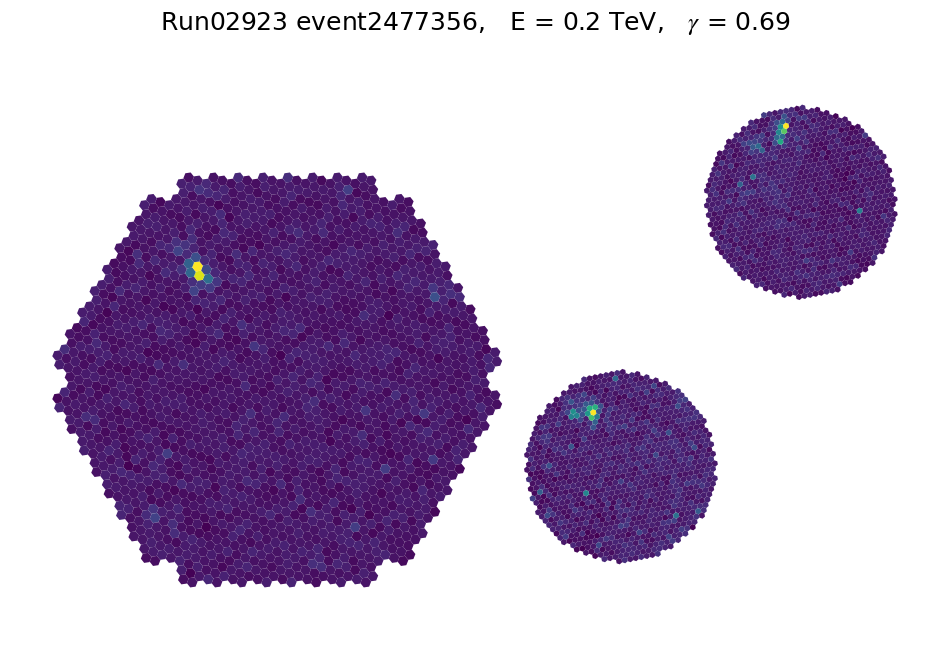

3 of 10


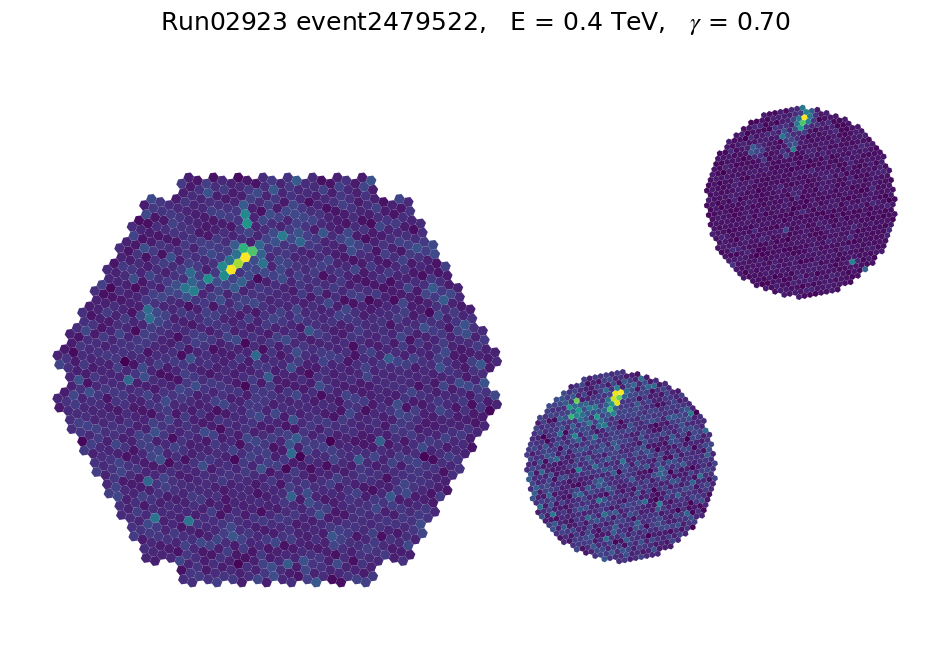

4 of 10


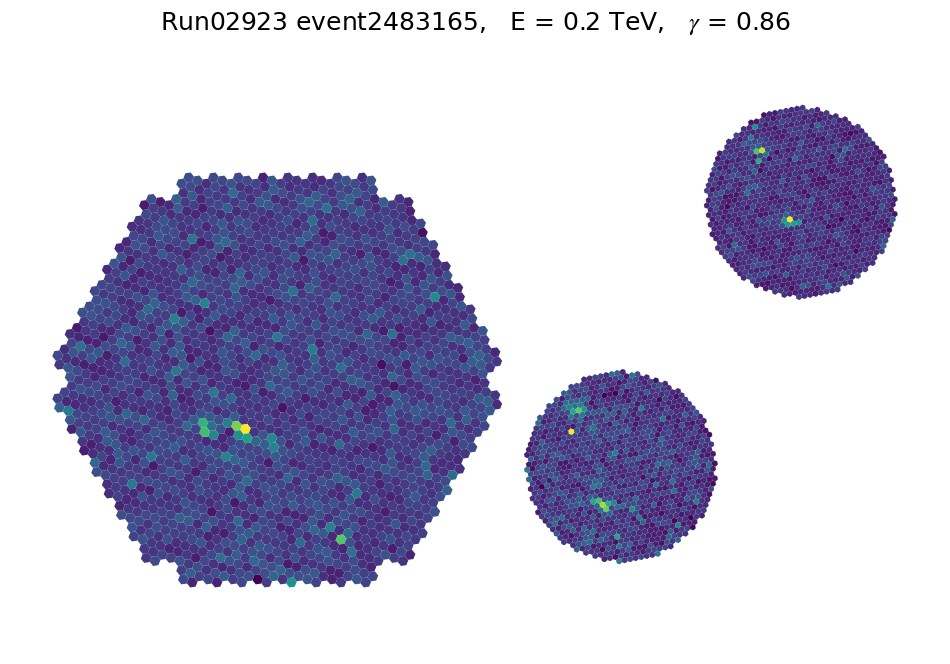

5 of 10


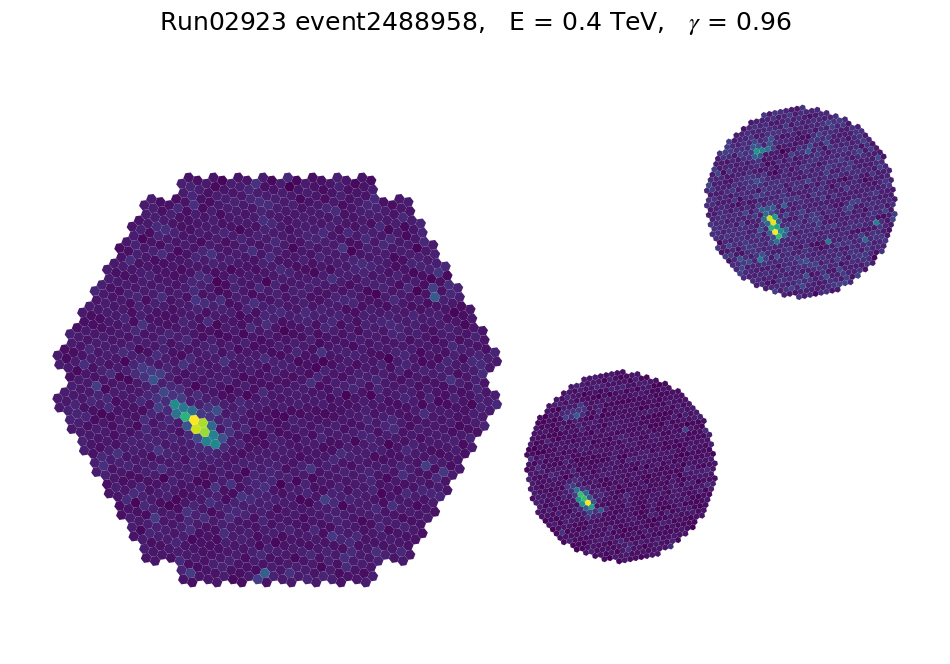

6 of 10


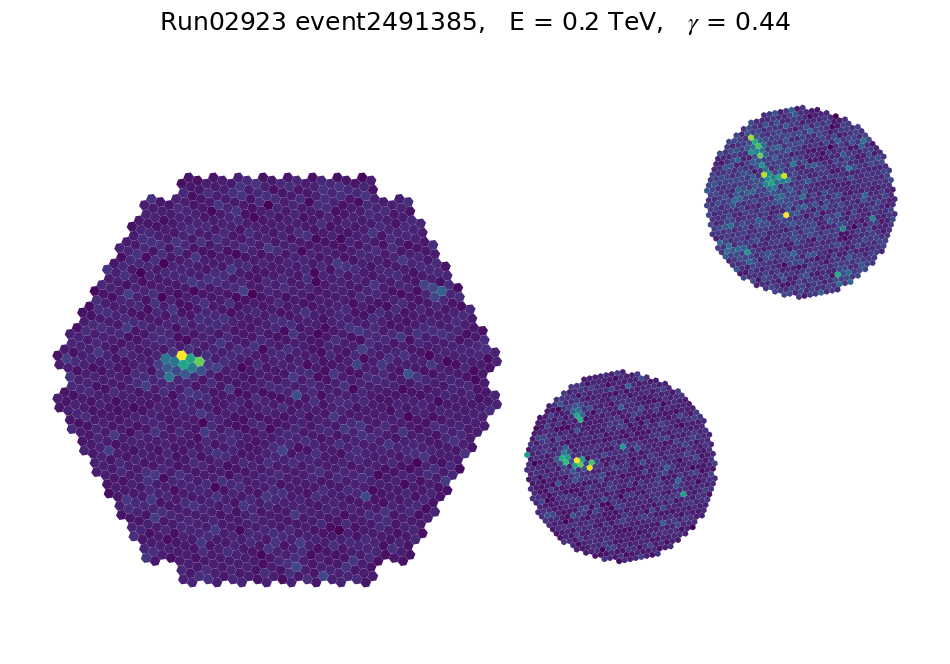

7 of 10


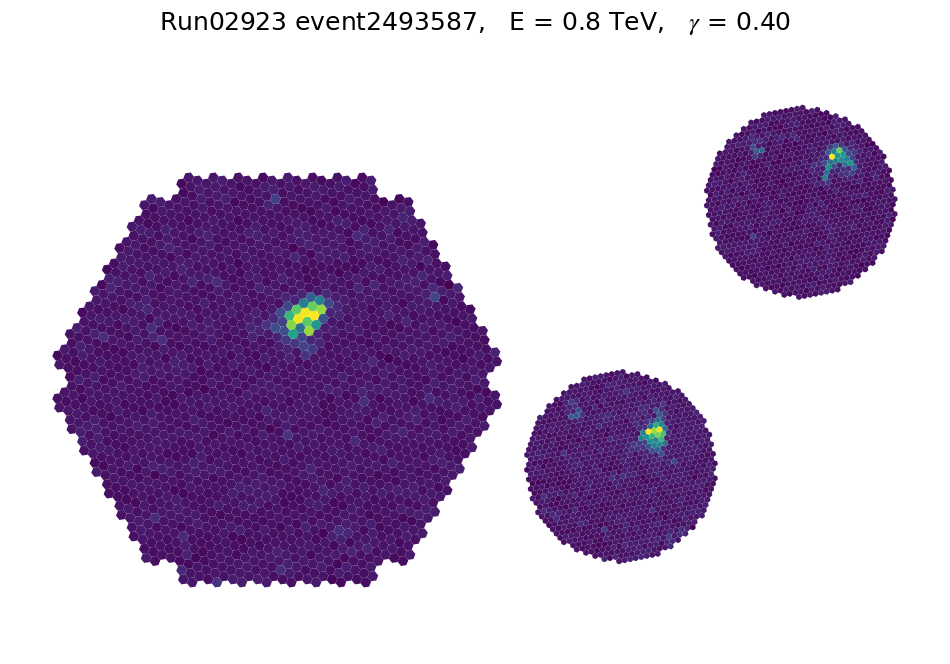

8 of 10


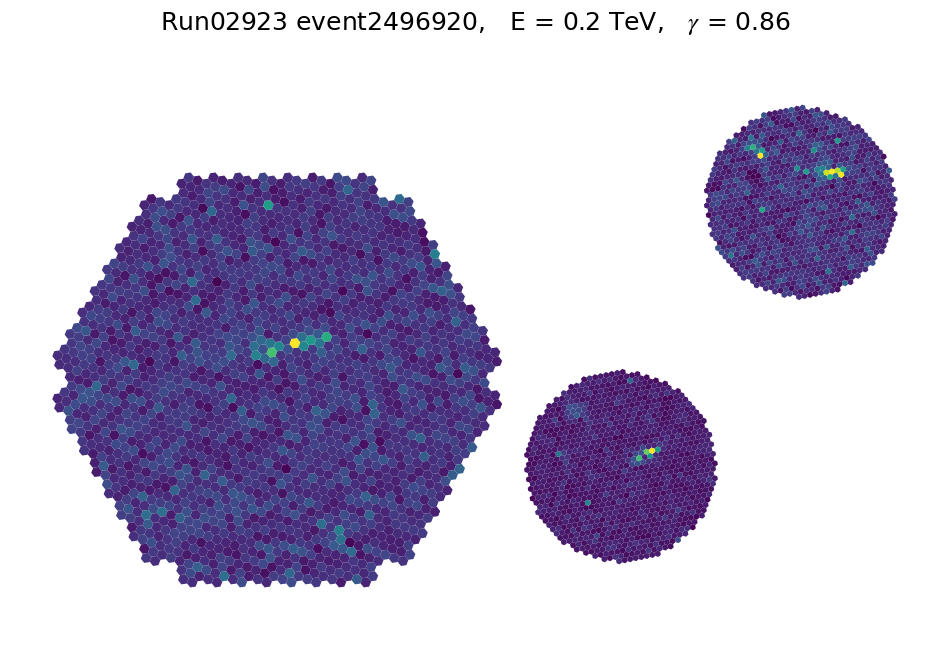

9 of 10


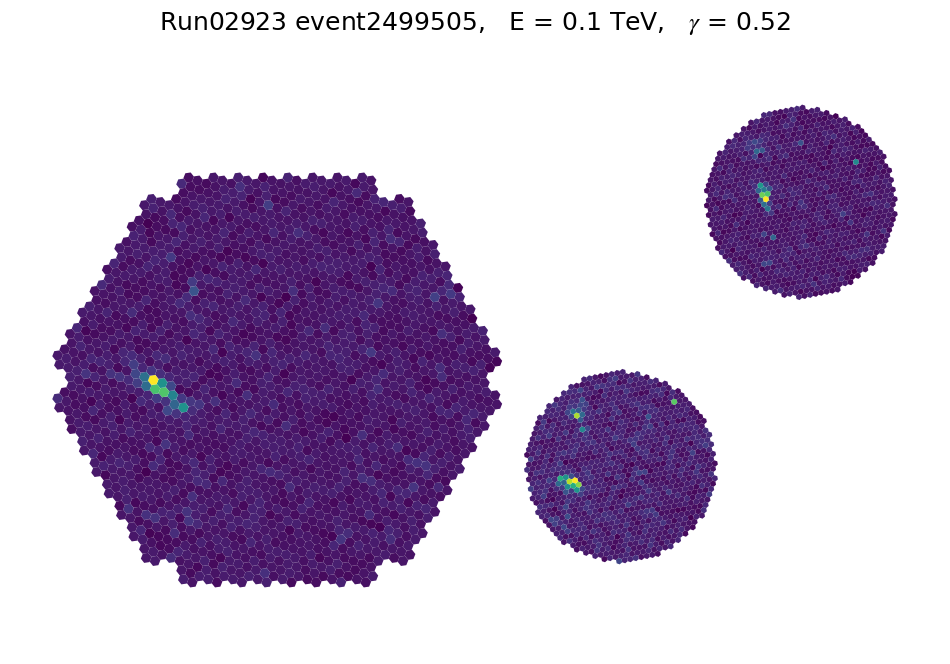

In [24]:
for j in range(len(event_id_l)):

    print(f'{j} of {len(event_id_l)}')
    fig, ax = plt.subplots(figsize=(12, 8))

    disp1 = CameraDisplay(camera_geometry_l, ax=ax, show_frame=False)
    disp2 = CameraDisplay(camera_geometry_m1, ax=ax, show_frame=False)
    disp3 = CameraDisplay(camera_geometry_m2,  ax=ax, show_frame=False)

    # disp1.add_colorbar()
    # disp2.add_colorbar(label="pixel charge")

    disp1.image = image_l[j]
    disp2.image = image_m1[j]
    disp3.image = image_m2[j]

    ax.set_title(f"Run{run_l[i]:05.0f} event{event_id_l[j]},   E = {energ[j]:.1f} TeV,   $\gamma$ = {gamma[j]:.2f}")
    # ax2.set_title('MAGIC-I')
    # ax4.set_title('MAGIC-II')
    # ax3.set_title('LST-1')
    # for ax in [ax1, ax2]:
    # ax.set_xlim(-80, 64)
    # ax.set_ylim(-34, 41)
    # for ax in [ax1, ax2, ax3, ax4]:
    ax.axis('off')


#     plt.savefig(f'{pltpath}Run{run_l[j]:05.0f}.ev{event_id_l[j]}.png', bbox_inches='tight', dpi=dpi)
    plt.show()

## Other geometry

In [25]:
event_source1 = MAGICEventSource(input_url=file_m1[0], process_run=False,)
event_source2 = MAGICEventSource(input_url=file_m2[0], process_run=False,)

subarray1 = event_source1.subarray
subarray2 = event_source2.subarray

camera_geometry_m1 = subarray1.tel[1].camera.geometry
camera_geometry_m2 = subarray2.tel[2].camera.geometry

# reading camera geometries
camera_geometry_l  = CameraGeometry.from_name('LSTCam', version=2)


xm1 = camera_geometry_m1.pix_x
ym1 = camera_geometry_m1.pix_y
xm2 = camera_geometry_m2.pix_x
ym2 = camera_geometry_m2.pix_y

camera_geometry_m1.pix_x, camera_geometry_m1.pix_y = -ym1, -xm1
camera_geometry_m2.pix_x, camera_geometry_m2.pix_y = -ym2, -xm2

camera_geometry_m1.pix_rotation = camera_geometry_m1.pix_rotation*1.96
camera_geometry_m2.pix_rotation = camera_geometry_m2.pix_rotation*1.96

File /fefs/onsite/common/MAGIC/data/M2/event/Calibrated/2020/11/19/20201119_M2_05093174.001_Y_CrabNebula-W0.40+035.root has only 1 drive reports.


0 of 10


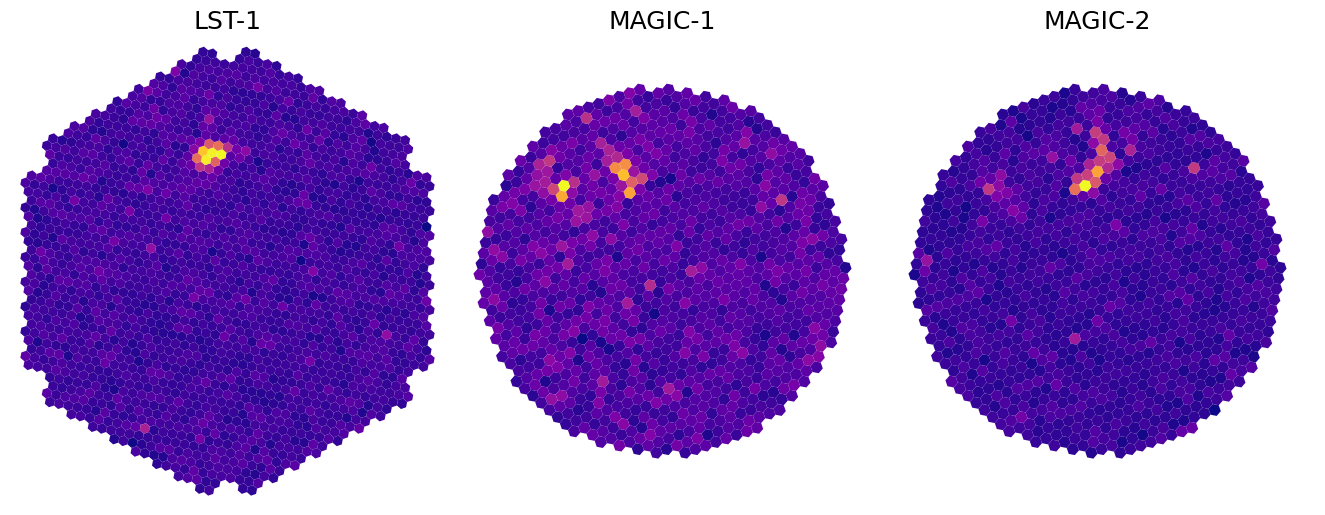

In [43]:
cmap='plasma'

j = 0

print(f'{j} of {len(event_id_l)}')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13.5, 5.4))

disp1 = CameraDisplay(camera_geometry_l, ax=ax1, show_frame=False, cmap=cmap)
disp2 = CameraDisplay(camera_geometry_m1, ax=ax2, show_frame=False, cmap=cmap)
disp3 = CameraDisplay(camera_geometry_m2,  ax=ax3, show_frame=False, cmap=cmap)

# disp1.add_colorbar()
# disp2.add_colorbar(label="pixel charge")

disp1.image = image_l[j]
disp2.image = image_m1[j]
disp3.image = image_m2[j]

# disp1.add_ellipse(centroid=(-corey[0][j], -corex[0][j]), width=width[0][j], length=length[0][j], angle=(-angle[0][j]+np.pi/2), color='w')
# disp2.add_ellipse(centroid=(-corey[1][j], -corex[1][j]), width=width[1][j], length=length[1][j], angle=(-angle[1][j]+np.pi/2), color='w')
# disp3.add_ellipse(centroid=(-corey[2][j], -corex[2][j]), width=width[2][j], length=length[2][j], angle=(-angle[2][j]+np.pi/2), color='w')


# ax.set_title(f"Run{run_l[i]:05.0f} event{event_id_l[j]},   E = {energ[j]:.1f} TeV,   $\gamma$ = {gamma[j]:.2f}")
ax2.set_title('MAGIC-1')
ax3.set_title('MAGIC-2')
ax1.set_title('LST-1')


for ax in [ax1, ax2, ax3]:
    ax.axis('off')
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)



# for i, ax in zip(range(3), [ax1, ax2, ax3]):
# #     slope=np.tan(-df.at[N,'psi']+np.pi/2)
#     xs1, ys1 = geom.line_in_direction(np.rad2deg(-angle[i][j]+np.pi/2), [-corey[i][j],-corex[i][j]], ax1)
#     xs2, ys2 = geom.line_in_direction(np.rad2deg(-angle[i][j]+np.pi/2)+180, [-corey[i][j],-corex[i][j]], ax1)
#     ax1.plot([xs1[1],xs2[1]], [ys1[1],ys2[1]], '-', color='w', lw=1.5, alpha=0.5)
#     if i != 0:
#         ax.plot([xs1[1],xs2[1]], [ys1[1],ys2[1]], '-', color='w', lw=1.5, alpha=0.5)


ax1.set_ylim(-1.25, 1.25)
ax1.set_xlim(-1, 1)
ax2.set_ylim(-0.5, 0.5)
ax2.set_xlim(-0.6, 0.6)
ax3.set_ylim(-0.5, 0.5)
ax3.set_xlim(-0.6, 0.6)
    
    
plt.savefig(f'{pltpath}total-Run{run_l[j]:05.0f}.ev{event_id_l[j]}.png', bbox_inches='tight', dpi=200)
# plt.savefig(f'{pltpath}lines-Run{run_l[j]:05.0f}.ev{event_id_l[j]}.png', bbox_inches='tight', dpi=200)

# plt.savefig(f'{pltpath}test.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [14]:
angle[1][14]

1.1523203177170074